In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
data = pd.read_csv('/content/microbes.csv')
print(f'Dataset shape: {data.shape}')
print()
print('Dataset head:')
data.head()

Dataset shape: (30527, 26)

Dataset head:


,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [3]:
data.columns

Index(['Unnamed: 0', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms'],
      dtype='object')

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [6]:
data.groupby(['microorganisms']).count()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
microorganisms,,,,,,,,,,,,,,,,,,,,,
Aspergillus sp,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888,...,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888
Diatom,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818,...,1818,1818,1818,1818,1818,1818,1818,1818,1818,1818
Penicillum,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
Pithophora,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,...,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
Protozoa,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888,...,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888
Raizopus,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,...,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552
Spirogyra,611,611,611,611,611,611,611,611,611,611,...,611,611,611,611,611,611,611,611,611,611
Ulothrix,7420,7420,7420,7420,7420,7420,7420,7420,7420,7420,...,7420,7420,7420,7420,7420,7420,7420,7420,7420,7420
Volvox,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,...,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320


In [7]:
labels = data['microorganisms'].unique()
label_counts = data.groupby(['microorganisms']).size()
labels.sort()

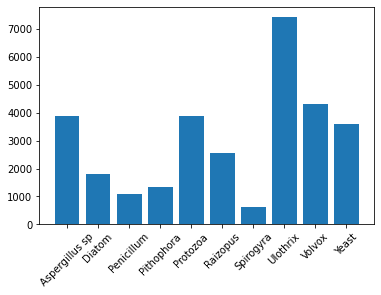

In [8]:
plt.bar(labels, label_counts)
plt.xticks(rotation=45)
plt.show()

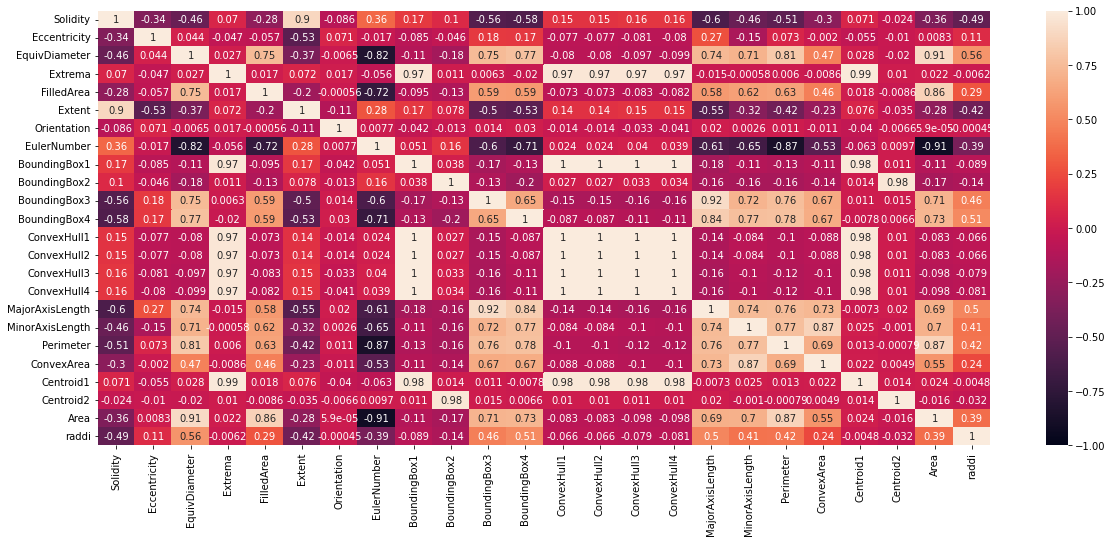

In [9]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True)

In [10]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


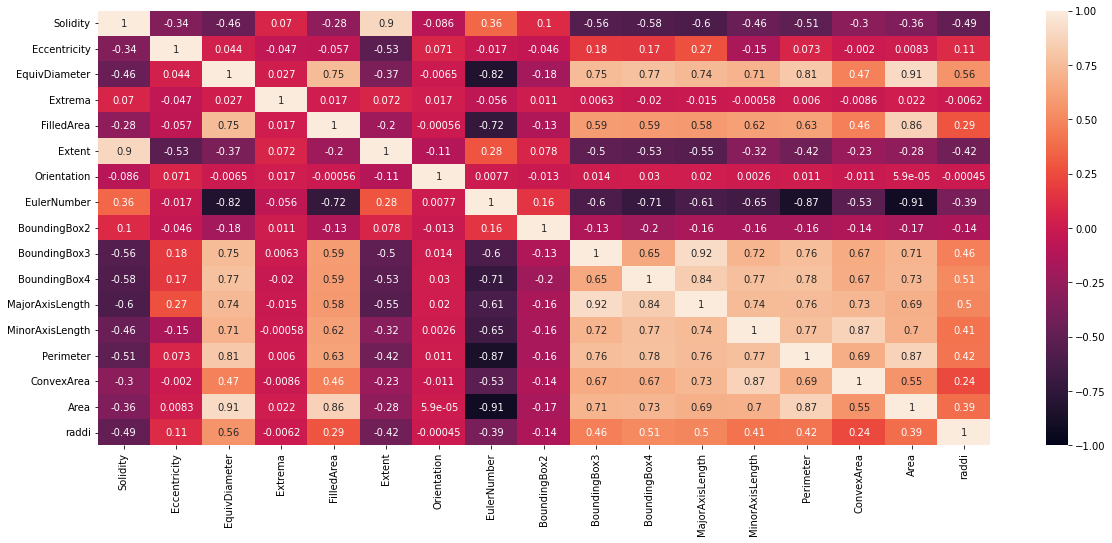

In [11]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True)

In [12]:
def prepare_data(x):
  deviations = x.std(axis = 0)
  averages = x.mean(axis = 0)
  new_normalized_x = np.divide(np.subtract(x, averages) , deviations)
  new_normalized_x_with_ones = np.hstack([np.ones([len(new_normalized_x), 1]), 
                                          new_normalized_x])
  return new_normalized_x_with_ones, averages, deviations

In [13]:
data['microorganisms'] = pd.factorize(data['microorganisms'])[0]

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

y = data['microorganisms']
X = data.drop(['microorganisms'], axis=1)

m = len(y)
input_size = X.shape[1]
num_labels = max(data['microorganisms'])+1

In [14]:
y = np.array(y)
y_onehot = np.zeros((m, num_labels)) 
for i in range(m):
    y_onehot[i][y[i]] = 1

In [15]:
normalized_X, mean, std = prepare_data(X)
normalized_X.shape

(28772, 18)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_X, y, train_size=0.65, random_state=42, stratify=y)

In [17]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, train_size=0.65, random_state=42, stratify=y_test)

In [18]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (18701, 18)
y_train: (18701,)
X_val: (6546, 18)
y_val: (6546,)
X_test: (3525, 18)
y_test: (3525,)


____________________________
<h2>Support Vector Machine(SVM):


In [20]:
class My_SVM:

  def __init__(self, C, sigma):
    self.svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * sigma**2), decision_function_shape='ovo')
    self.C = C
    self.sigma = sigma
  
  def fit(self, X, y):
    self.svm.fit(X, y)
    pred_lab, acc = self.accuracy(X, y)
    print("val_accuracy:", acc)

  def predict(self, X):
    return self.svm.predict(np.array(X))

  def accuracy(self, X, y):
    predicted_labels = self.svm.predict(X)
    aciertos = np.array(predicted_labels == y) * 1
    return predicted_labels, (np.sum(aciertos)/len(aciertos))

  def find_params(self, X_train, y_train, X_val, y_val):
    C_list = [0.1, 1, 5, 10]
    sigma_list = [0.1, 1, 5, 10]
    max_acc = 0
    for C_elem in C_list:
      for sig_elem in sigma_list:
        svm = My_SVM(C_elem,sig_elem)
        svm.fit(X_train, y_train)
        y_pred, acc = svm.accuracy(X_val, y_val)
        print("C:", C_elem, " | sigma:", sig_elem, "| accuracy:", acc)
        if acc > max_acc:
          max_acc = acc
          sigma = sig_elem
          C = C_elem
    print("Best C:", C)
    print("Best sigma:", sigma)
    self.C = C
    self.sigma = sigma

  def cross_val(self, X, y):
    scores = cross_val_score(self.svm, X, y, cv=10)
    return scores

In [21]:
svm = My_SVM(1, 0.1)
svm.fit(X_train, y_train)

val_accuracy: 1.0


In [ ]:
svm.cross_val(X_train, y_train)

In [22]:
y_pred, acc = svm.accuracy(X_test, y_test)
print(acc)

0.9804255319148936


In [23]:
target_names = ['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Rhizopus', 
                'Penicillium', 'Aspergillus sp', 'Protozoa', 'Diatom ', 'Ulothrix']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

     Spirogyra       1.00      0.80      0.89        70
        Volvox       1.00      1.00      1.00       490
    Pithophora       1.00      0.88      0.93       144
         Yeast       1.00      0.98      0.99       424
      Rhizopus       1.00      1.00      1.00       297
   Penicillium       1.00      1.00      1.00       128
Aspergillus sp       1.00      0.93      0.97       458
      Protozoa       1.00      1.00      1.00       459
       Diatom        1.00      1.00      1.00       211
      Ulothrix       0.92      1.00      0.96       844

      accuracy                           0.98      3525
     macro avg       0.99      0.96      0.97      3525
  weighted avg       0.98      0.98      0.98      3525



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


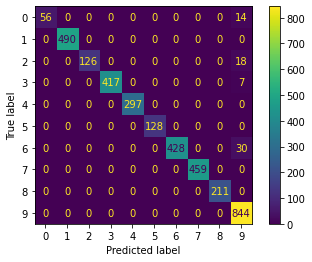

In [24]:
plot_confusion_matrix(svm.svm, X_test, y_test)  
plt.show()

In [ ]:
svm.find_params(X_train, y_train, X_val, y_val)

____________________________________
<h2>Regresión logística:

In [25]:
class My_reg_log:

  def __init__(self, size, lamb=1):
    self.theta = np.zeros(size)
    self.lamb = lamb

  def sigmoid(self, e):
    e = np.array(e).astype(float);
    s = lambda z: 1/(1+np.exp(-z))
    e = s(e)
    return e

  def func_coste_lamb(self, theta, X, Y):
    m = len(Y)
    primer_termino = np.dot(np.transpose(np.log(self.sigmoid(np.dot(X, theta)))), Y)
    segundo_termino = np.dot(np.log(1-np.transpose(self.sigmoid(np.dot(X, theta)))),
                            (1-Y))
    Aux = theta[1:]
    tercer_termino = (self.lamb/(2*m))*np.sum(np.power(Aux,2))
    return (-1/m)*np.sum(primer_termino + segundo_termino)+tercer_termino

  def func_gradiente_lamb(self, theta, X, Y):
    m = len(Y)
    primer_termino = np.transpose(X)
    segundo_termino = np.subtract(self.sigmoid(np.dot(X, theta)), Y) 
    tercer_termino = (self.lamb/m)*theta
    tercer_termino[0] = 0
    return (1/m)*np.matmul(primer_termino,segundo_termino)+tercer_termino

  def train(self, X, Y):
    result = opt.fmin_tnc(func=self.func_coste_lamb, x0=self.theta, 
                      fprime=self.func_gradiente_lamb, args =(X,Y))
    
    self.theta = result[0]
    return result[0]

  def predict(self, X):
    return np.dot(X,np.transpose(self.theta))

  def get_theta(self):
    return self.theta

In [26]:
class My_classifier_log:
  def __init__(self, n_parameters, n_labels, lamb=1):
    self.n_labels = n_labels
    self.n_parameters = n_parameters
    self.lamb = lamb
    reg_logs = []
    for i in range(0, self.n_labels):
      reg_log = My_reg_log(n_parameters,lamb)
      reg_logs.append(reg_log)

    self.reg_logs = np.array(reg_logs)

  def treat_labels(self, y):
    y_log = []
    for i in range(0,len(label_counts)):
      y_log.append((y == i)*1)
    y_log = np.array(y_log)
    return y_log

  def train(self, X, y):
    y_ova = self.treat_labels(y)
    for i in range(0, self.n_labels):
      self.reg_logs[i].train(X, y_ova[i])

  def accuracy(self, X, y):
    predictions = []
    for reg_log in self.reg_logs:
      p = reg_log.predict(X)
      predictions.append(p)
    predictions = np.array(predictions)
    predictions = np.stack(predictions, axis=-1)
    predicted_label = np.argmax(predictions, axis=1)
    hits = (predicted_label == y) * 1
    hits = np.sum(hits)
    return predicted_label, hits/len(y)

  def theta(self):
    return np.array([reg_log.get_theta() for reg_log in self.reg_logs])

In [27]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

In [28]:
X_train_poly.shape

(18701, 190)

In [ ]:
lamb_l = [0.01, 0.1, 1, 10, 100]

for lam in lamb_l:
  mcl = My_classifier_log(X_train_poly.shape[1], 10, lam)
  mcl.train(X_train_poly, y_train)
  pred_lab, acc = mcl.accuracy(X_val_poly, y_val)
  print("lambda: ", lam, "| val_accuracy:", acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


[4 9 9 ... 7 7 7]
0.65948670944088
[4 9 9 ... 7 7 7]
0.6391689581423771
[4 9 9 ... 7 7 7]
0.6371830125267339
[4 9 9 ... 7 7 7]
0.6332111212954477
[4 9 9 ... 7 7 9]
0.5802016498625114


In [29]:
mcl = My_classifier_log(X_train_poly.shape[1], 10, 0.1)
mcl.train(X_train_poly, y_train)
y_pred_val, acc = mcl.accuracy(X_val_poly, y_val)
print("val_accuracy:", acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


| val_accuracy: 0.6391689581423771


In [31]:
y_pred, acc = mcl.accuracy(X_test_poly, y_test)

In [32]:
target_names = ['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Rhizopus', 
                'Penicillium', 'Aspergillus sp', 'Protozoa', 'Diatom ', 'Ulothrix']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

     Spirogyra       0.64      0.61      0.63        70
        Volvox       0.56      0.61      0.58       490
    Pithophora       0.87      0.14      0.24       144
         Yeast       0.64      0.70      0.67       424
      Rhizopus       0.84      0.92      0.88       297
   Penicillium       0.54      0.48      0.51       128
Aspergillus sp       0.57      0.62      0.59       458
      Protozoa       0.63      0.68      0.65       459
       Diatom        0.33      0.06      0.10       211
      Ulothrix       0.60      0.68      0.64       844

      accuracy                           0.62      3525
     macro avg       0.62      0.55      0.55      3525
  weighted avg       0.61      0.62      0.60      3525



___________________
<h2>Red neuronal(NN):

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_X, y_onehot, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42)

In [37]:
class My_NN:

  def __init__(self, input, hidden, output, lamb=1):
    self.input = input
    self.hidden = hidden
    self.output = output
    self.lamb = lamb
    theta1 = np.ones((input +1, hidden))
    theta2 = np.ones((hidden +1, output))
    params_rn = np.concatenate((np.ravel(theta1), np.ravel(theta2)), axis=None)
    self.pesos = np.random.uniform(-0.15, 0.15, params_rn.shape[0])


  def sigmoid(self, e):
    e = np.array(e).astype(float);
    s = lambda z: 1/(1+np.exp(-z))
    e = s(e)
    return e

  def rebuild(self, pesos):
    theta1 = np.reshape(self.pesos [:self.hidden * (self.input +1)],
                        (self.hidden, (self.input +1)))
    theta2 = np.reshape(self.pesos [self.hidden * (self.input +1):],
                        (self.output, (self.hidden +1)))
    return theta1, theta2

  def forward_prop_one(self,X,theta1,theta2):
    first = np.concatenate(([1],X))
    first = np.matmul(first,theta1.T)
    first = self.sigmoid(first)
    second = np.concatenate(([1],first))
    second = np.matmul(second,theta2.T)
    output = self.sigmoid(second)
    return output

  def forward_prop(self, X, theta1, theta2):

    m = X.shape[0]
    A1 = np.hstack([np.ones([m, 1]), X])
    Z2 = np.dot(A1, theta1.T)
    A2 = np.hstack([np.ones([m, 1]), self.sigmoid(Z2)])
    Z3 = np.dot(A2, theta2.T)
    H = self.sigmoid(Z3)
    return (A1, A2, H)

  def metrics(self):
    pass

  def func_coste_k(self, x, y, theta1, theta2):

    prim_componente = np.dot(-y, np.log(self.forward_prop_one(x, theta1, theta2)))
    seg_componente = np.dot(-(1 - y), 
                            np.log(1 - self.forward_prop_one(x, theta1, theta2)))
    return np.sum(prim_componente + seg_componente)

  def func_coste_m_lambda(self, X, y, theta1, theta2, lamb=1):
    cost = 0
    for i in range(X.shape[0]):
      t = self.func_coste_k(X[i], y[i], theta1, theta2)
      cost = cost + t
    terc_componente = np.sum(theta1[1:]**2) + np.sum(theta2[1:]**2)
    terc_componente = (lamb/(2*len(y))) * terc_componente

    print((1/X.shape[0]) * cost + terc_componente)
    return (1/X.shape[0]) * cost + terc_componente

  def train(self, X_train, y_train, X_val, y_val, iters, portion_data , lamb=1):
    iterations = iters
    num_entradas = self.input
    num_ocultas = self.hidden
    num_etiquetas = self.output
    pesos = self.pesos
    

    _, X_batch, _, y_batch = train_test_split(
    X_train, y_train, test_size=portion_data, random_state=42)

    resultado = opt.minimize(fun = self.backprop_test, x0 = pesos,
                        args = (num_entradas, 
                                num_ocultas, num_etiquetas, X_batch, y_batch), 
                        method='TNC', jac=True, options={'maxiter': iterations})    
    self.pesos = resultado.x
    theta1, theta2 = self.rebuild(self.pesos)
    acuracy_val = self.accuracy(X_val, y_val)
    acuracy_train = self.accuracy(X_train, y_train)
    val_loss = self.func_coste_m_lambda(X_val,y_val, theta1, theta2)
    return acuracy_train, acuracy_val, resultado.fun, val_loss

  def train_old(self, X_train, y_train, X_val, y_val, batch_proportion, epochs, iters, lamb=1):
    iterations = iters
    num_entradas = self.input
    num_ocultas = self.hidden
    num_etiquetas = self.output

    for i in range(epochs):
      pesos = self.pesos
      _, X_batch, _, y_batch = train_test_split(
      X_train, y_train, test_size=batch_proportion, stratify=y_train)
      resultado = opt.minimize(fun = self.backprop_test, x0 = pesos,
                          args = (num_entradas, 
                                  num_ocultas, num_etiquetas, X_batch, y_batch), 
                          method='TNC', jac=True, options={'maxiter': iterations})    
      self.pesos = resultado.x
      acuracy = self.accuracy(X_val, y_val)
      print("epoch=", i, ",loss=", resultado.fun, ",accuracy=", acuracy)

    return resultado
    
  def predict(self, X, theta1, theta2):
    predictions = self.forward_prop(X, theta1, theta2)[2]
    return predictions

  def accuracy(self, X_test, y_test):
    theta1, theta2 = self.rebuild(self.pesos)
    predictions = self.predict(X_test,theta1, theta2)
    predictions = np.argmax(predictions, axis = 1)
    y = np.argmax(y_test, axis = 1)
    predictions = np.ravel(predictions)
    hits = np.sum(predictions == y)
    return hits/len(y)


  def backprop_test(self, pesos, input, hidden, output, X, y):

    theta1 = np.reshape(pesos [:hidden * (input +1)],
                        (hidden, (input +1)))
    theta2 = np.reshape(pesos [hidden * (input +1):],
                        (output, (hidden +1)))
    
    Delta1 = np.zeros(theta1.shape)
    Delta2 = np.zeros(theta2.shape)

    A1, A2, H = self.forward_prop(X, theta1, theta2)

    m = len(y)

    for t in range(m):
      a1t = A1[t, :] # (401,)
      a2t = A2[t, :] # (26,)
      ht = H[t, :] # (10,)
      yt = y[t] # (10,)
      d3t = ht - yt # (10,)
      d2t = np.dot(theta2.T, d3t) * (a2t * (1 - a2t)) # (26,)
      Delta1 = Delta1 + np.dot(d2t[1:, np.newaxis], a1t[np.newaxis, :])
      Delta2 = Delta2 + np.dot(d3t[:, np.newaxis], a2t[np.newaxis, :])

    Delta1 = Delta1 * (1/m)
    Delta2 = Delta2 * (1/m)
    index0_Delta1 =  Delta1[0]
    index0_Delta2 =  Delta2[0]
    reg_1 = (self.lamb /m)*theta1
    reg_2 = (self.lamb /m)*theta2
    Delta1 = Delta1 + reg_1
    Delta2 = Delta2 + reg_2
    Delta1[0] = index0_Delta1
    Delta2[0] = index0_Delta2

    gradiente = np.concatenate((np.ravel(Delta1), np.ravel(Delta2)), axis=None)
    coste = self.func_coste_m_lambda(X, y, theta1, theta2, self.lamb )

    return (coste, gradiente)

In [ ]:
nn3 = My_NN(18,100,10)
result3 = nn3.train(X_train, y_train, X_val, y_val, 1000, 0.99)

In [ ]:
result3

In [ ]:
theta1, theta2 = nn3.rebuild(nn3.pesos)
y_pred = nn3.predict(X_test, theta1, theta2)

In [ ]:
target_names = ['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Rhizopus', 
                'Penicillium', 'Aspergillus sp', 'Protozoa', 'Diatom ', 'Ulothrix']
print(classification_report(y_test, (y_pred > 0.5)*1, target_names=target_names))

                precision    recall  f1-score   support

     Spirogyra       0.88      0.69      0.77       187
        Volvox       0.85      0.73      0.79      1323
    Pithophora       0.93      0.60      0.73       370
         Yeast       0.91      0.78      0.84      1152
      Rhizopus       0.93      0.96      0.94       803
   Penicillium       0.91      0.43      0.58       376
Aspergillus sp       0.81      0.56      0.67      1252
      Protozoa       0.91      0.91      0.91      1220
       Diatom        0.78      0.49      0.60       570
      Ulothrix       0.86      0.73      0.79      2242

     micro avg       0.87      0.72      0.79      9495
     macro avg       0.88      0.69      0.76      9495
  weighted avg       0.87      0.72      0.79      9495
   samples avg       0.71      0.72      0.71      9495



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nn_train_old = My_NN(18,100,10)
result_old = nn_train_old.train_old(X_train, y_train, X_val, y_val, 1024, 20, 200, 1)

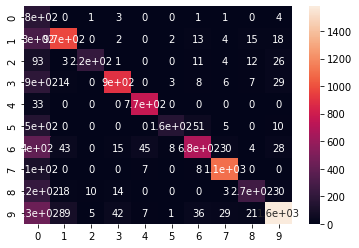

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax((y_pred > 0.5)*1, axis=1))
f = sns.heatmap(cm, annot=True)

iters= 5 (0.2384049554781262, 0.2456774599182647, 3.0703016554431044, 3.06297187793448)
iters= 10 (0.2526519550909795, 0.25699465576862623, 3.0171059483472624, 3.0092930452186826)
iters= 20 (0.283855981416957, 0.2881169443571204, 2.9352894364617255, 2.927705470991274)
iters= 40 (0.408052651955091, 0.4151210311222886, 2.618199609581462, 2.5862795452453398)
iters= 80 (0.43724351529229577, 0.4434140207481924, 2.440160318935027, 2.419246209377915)
iters= 160 (0.5511420828493999, 0.5529707639107199, 2.0702711113322416, 2.1179300378287635)
iters= 320 (0.5949670925280681, 0.5922665828355863, 1.9829000896796223, 2.048327538461244)


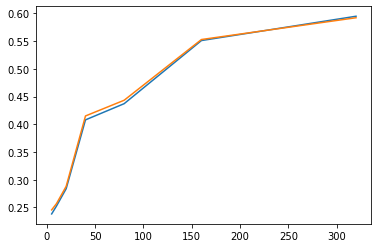

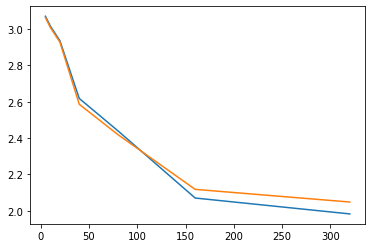

In [ ]:
l = [5,10,20, 40, 80, 160, 320]
train_losses = []
val_losses = []
accuracies_train = []
accuracies_val = []
for i in l:
  nn = My_NN(18,20,10)
  result = nn.train(X_train, y_train, X_val, y_val, i, 0.2)
  accuracies_train.append(result[0])
  accuracies_val.append(result[1])
  train_losses.append(result[2])
  val_losses.append(result[3])
  print("iters=", i, result)

fig = plt.figure()
ax = plt.axes()
ax.plot(l, accuracies_train)
ax.plot(l, accuracies_val)
fig = plt.figure()
ax = plt.axes()
ax.plot(l, train_losses)
ax.plot(l, val_losses)


iters= 5 (0.2384049554781262, 0.2456774599182647, 3.079121050347359, 3.0667131490939434)
iters= 10 (0.2384049554781262, 0.2456774599182647, 3.0279331896005446, 3.0128901027850774)
iters= 20 (0.2564459930313589, 0.25919522162841874, 2.927110125479059, 2.9131111251242823)
iters= 40 (0.3856755710414247, 0.3876139578748821, 2.636452510742635, 2.605044034255848)
iters= 80 (0.5210994967092528, 0.5177617101540396, 2.2066081910742277, 2.2052965495154275)
iters= 160 (0.5712737127371273, 0.5663313423451745, 2.0037773625298807, 2.048551909061496)
iters= 320 (0.6186604723190089, 0.6101854762653254, 1.8923672594012528, 1.9579935885023811)


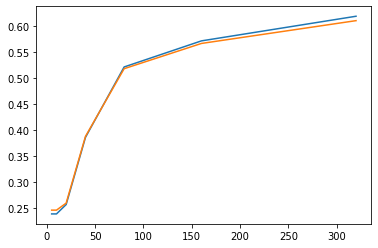

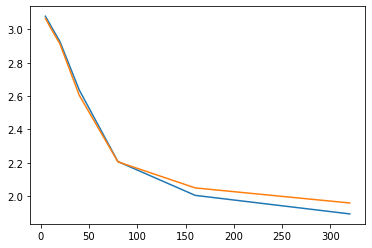

In [ ]:
l = [5,10,20, 40, 80, 160, 320]
train_losses = []
val_losses = []
accuracies_train = []
accuracies_val = []
for i in l:
  nn = My_NN(18,20,10)
  result = nn.train(X_train, y_train, X_val, y_val, i, 0.5)
  accuracies_train.append(result[0])
  accuracies_val.append(result[1])
  train_losses.append(result[2])
  val_losses.append(result[3])
  print("iters=", i, result)

fig = plt.figure()
ax = plt.axes()
ax.plot(l, accuracies_train)
ax.plot(l, accuracies_val)
fig = plt.figure()
ax = plt.axes()
ax.plot(l, train_losses)
ax.plot(l, val_losses)

iters= 5 (0.2384049554781262, 0.2456774599182647, 3.3078283664381583, 3.3033595352930933)
iters= 10 (0.32063492063492066, 0.3286702294875825, 2.930036767488093, 2.9224601551153953)
iters= 20 (0.30801393728223, 0.31216598553913866, 2.9427685799901484, 2.936213667609875)
iters= 40 (0.37553232675183895, 0.38101226029550456, 2.6826138854388173, 2.6632400929002067)
iters= 80 (0.4953929539295393, 0.4963847846589123, 2.2772326523837885, 2.2938131023173254)
iters= 160 (0.5654665118079752, 0.5631876768311852, 2.031311280610895, 2.08330002588291)


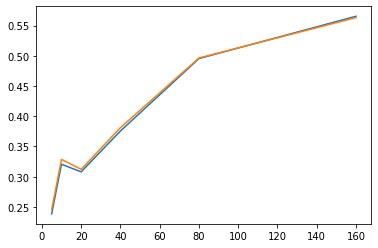

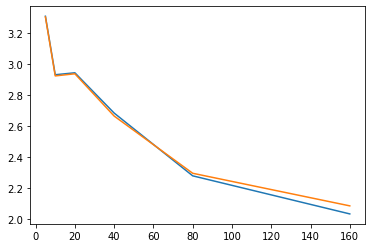

In [ ]:
l = [5,10,20, 40, 80, 160]
train_losses = []
val_losses = []
accuracies_train = []
accuracies_val = []
for i in l:
  nn = My_NN(18,20,10)
  result = nn.train(X_train, y_train, X_val, y_val, i, 0.99)
  accuracies_train.append(result[0])
  accuracies_val.append(result[1])
  train_losses.append(result[2])
  val_losses.append(result[3])
  print("iters=", i, result)

fig = plt.figure()
ax = plt.axes()
ax.plot(l, accuracies_train)
ax.plot(l, accuracies_val)
fig = plt.figure()
ax = plt.axes()
ax.plot(l, train_losses)
ax.plot(l, val_losses)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (100,),random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
for lamb in lamb_l:
  nn = My_NN(18,15,10,lamb)
  result = nn.train(X_train, y_train, X_val, y_val)
  print(lamb, ":", nn.accuracy(X_test, y_test))

[9 9 4 ... 9 7 7] vs [8 7 6 ... 2 3 3]
0.01 : 0.4660347551342812
[1 9 4 ... 9 7 7] vs [8 7 6 ... 2 3 3]
0.1 : 0.48794102159031066
[7 9 4 ... 9 7 3] vs [8 7 6 ... 2 3 3]
1 : 0.49794628751974723
[1 9 4 ... 9 7 7] vs [8 7 6 ... 2 3 3]
10 : 0.49447077409162715
[1 9 4 ... 9 7 9] vs [8 7 6 ... 2 3 3]
100 : 0.40884676145339655
